# Лабораторная работа 1
#### Адонин Антон 22931

Задание 1

In [111]:
import math

import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad

In [112]:
from scipy.fft import *


In [113]:
A = 2
T = 2
freq = 1 / T
w = 2 * np.pi * freq

In [114]:
def impulse(t):
    if t % 2 < 1:
        return A
    else:
        return -A

In [115]:
def calc_a_0(t, func, T):
    I = quad(func, t, t + T)
    result = 2 / T * I[0]
    return result


def calc_a_n(t, n, func, w, T):
    I = quad(lambda t: func(t) * math.cos(n * w * t), t, t + T)
    result = 2 / T * I[0]
    return result


def calc_b_n(t, n, func, w, T):
    I = quad(lambda t: func(t) * math.sin(n * w * t), t, t + T)
    result = 2 / T * I[0]
    return result

In [116]:
def func_approximate(t, func, w, T, N=10):
    a_0 = calc_a_0(t, func, T)
    summa = 0
    for n in range(1, N + 1):
        a_n = calc_a_n(t, n, func, w, T)
        b_n = calc_b_n(t, n, func, w, T)
        summa += a_n * math.cos(n * w * t)
        summa += b_n * math.sin(n * w * t)
    return a_0 / 2 + summa

In [117]:
def plot_approximation(function, w, T, x0=-4, x1=4):
    x_values = np.linspace(x0, x1, 1000)
    y_impulses_list, y_approx_list, y_errors_list = [], [], []

    fig, axs = plt.subplots(2, 1)

    for x in x_values:
        y_func = function(x)
        y_approx = func_approximate(x, function, w, T)
        y_impulses_list.append(y_func)
        y_approx_list.append(y_approx)
        y_errors_list.append(y_approx - y_func)

    axs[0].plot(x_values, y_impulses_list)
    axs[0].plot(x_values, y_approx_list)
    axs[1].plot(x_values, y_errors_list)
    axs[0].set_ylabel('Амплитуда')
    axs[1].set_ylabel('Ошибка')
    plt.xlabel('Время, с')
    plt.show()
    return x_values, y_impulses_list, y_approx_list


/var/folders/gq/fm7sk90s2l327ztx9drv3yjh0000gn/T/ipykernel_12058/35798185.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I = quad(func, t, t + T)
/var/folders/gq/fm7sk90s2l327ztx9drv3yjh0000gn/T/ipykernel_12058/35798185.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval a

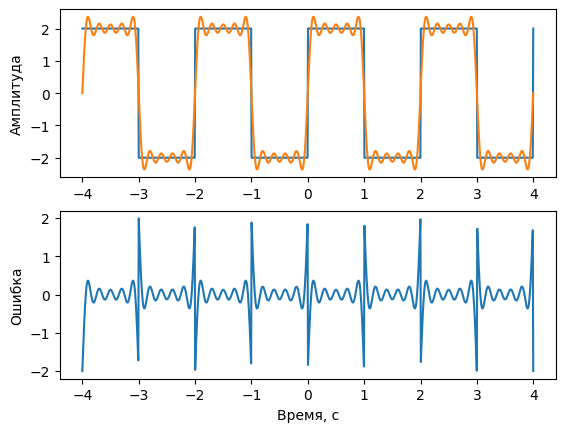

In [118]:
impulse_x_vals, impulse_y_vals, impulse_vals_approx = plot_approximation(impulse, w, T)

Задание 2

In [119]:

A_cos = A
freq_cos = 100
T_cos = 1 / freq_cos
w_cos = 2 * np.pi * freq_cos

def func_cos(t):
    return A_cos * math.cos(w_cos * t) 


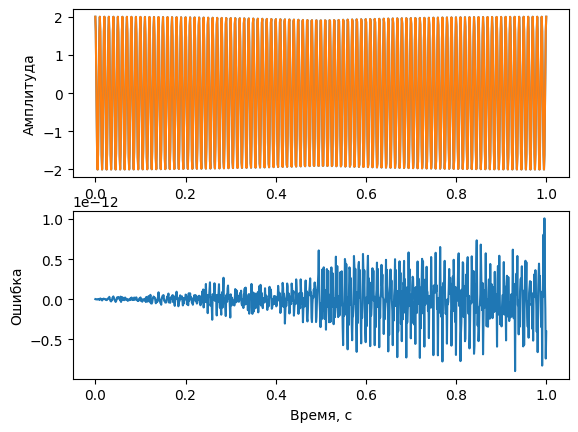

In [120]:
cos_x_vals, cos_y_vals, cos_y_vals_approx = plot_approximation(func_cos, x0=0, x1=1, w=w_cos, T=T_cos)

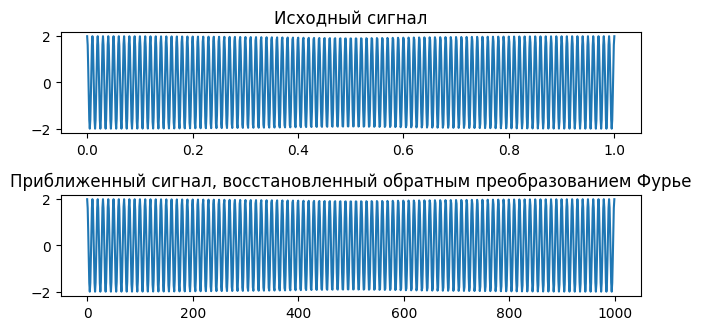

In [121]:
plt.subplot(3, 1, 1)
plt.plot(cos_x_vals, cos_y_vals)
plt.title('Исходный сигнал')

cos_fft = fft(cos_y_vals_approx)
cos_ifft = ifft(cos_fft)

plt.subplot(3, 1, 2)
plt.plot(cos_ifft)
plt.title('Приближенный сигнал, восстановленный обратным преобразованием Фурье')


plt.tight_layout()
plt.show()

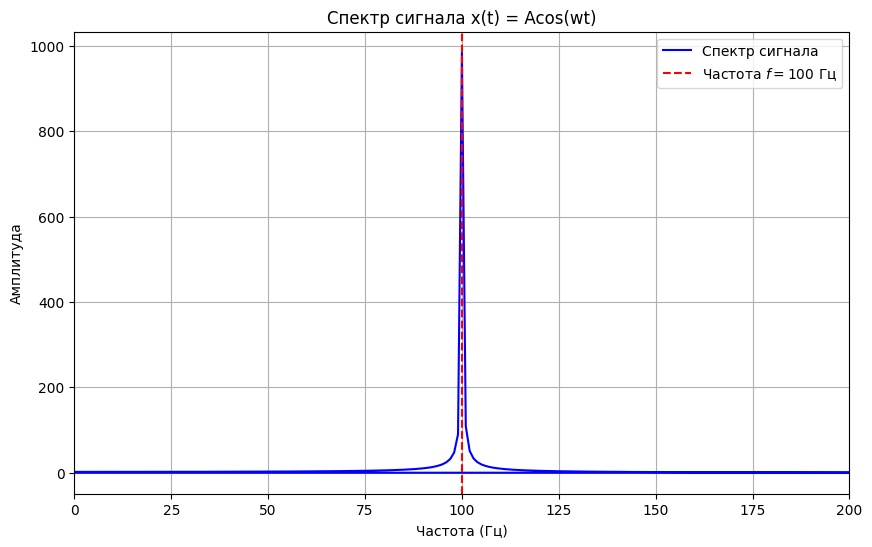

In [122]:
frequencies = fftfreq(len(cos_y_vals_approx), 1 / len(cos_y_vals_approx))

plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(cos_fft), 'b-', label='Спектр сигнала')
plt.xlim(0, 200)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр сигнала x(t) = Acos(wt)')
plt.axvline(freq_cos, color='r', linestyle='--', label='Частота $f = 100$ Гц')
plt.legend()
plt.grid(True)
plt.show()


In [123]:
impulse_fft = fft(impulse_y_vals)
impulse_fft_approx = fft(impulse_vals_approx)

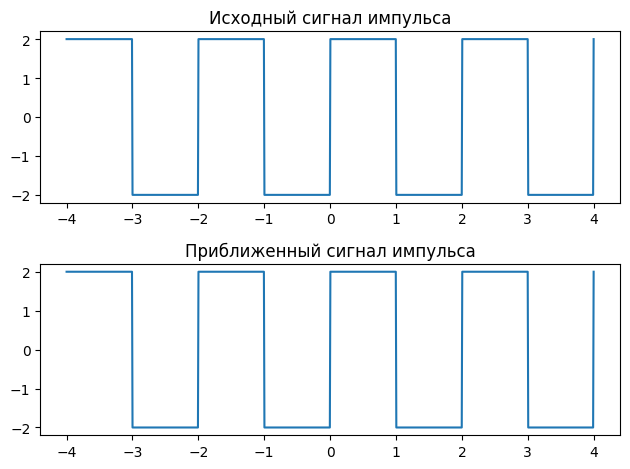

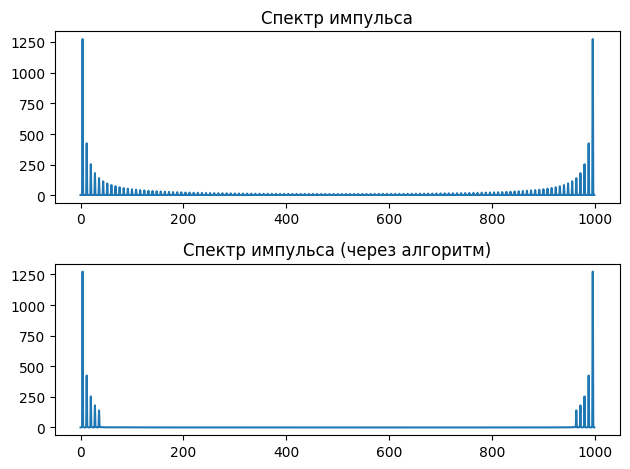

In [124]:
plt.subplot(2, 1, 1)
plt.plot(impulse_x_vals, impulse_y_vals)
plt.title('Исходный сигнал импульса')


plt.subplot(2, 1, 2)
plt.plot(impulse_x_vals, impulse_y_vals)
plt.title('Приближенный сигнал импульса')
plt.tight_layout()
plt.show()

plt.subplot(2, 1, 1)
plt.plot(np.abs(impulse_fft))
plt.title('Спектр импульса')

plt.subplot(2, 1, 2)
plt.plot(np.abs(impulse_fft_approx))
plt.title('Спектр импульса (через алгоритм)')


plt.tight_layout()
plt.show()